# <b>A. <span style='color:#3A6D8C'>Introduction</span></b>



In [ ]:
# Import library yang dibutukan
import warnings
import numpy as np

# Abaikan peringatan (warning)
warnings.filterwarnings('ignore')

### <b>B.1. <span style='color:#55679C'>Ekstrak Data</span></b>

In [ ]:
# Import library untuk ekstraksi data
import pandas as pd

# Ekstraksi dataset
raw_data = pd.read_excel(
    'https://raw.githubusercontent.com/MTOZZ/data_aspek_ikp/refs/heads/main/Ketahanan_Pangan.xlsx',
    engine = 'openpyxl'
)

# Urutkan data berdasarkan tanggal
raw_data = raw_data.sort_values(
    by = 'Year',
    ignore_index = True
)

# Tampilkan Data
display(raw_data)

,Year,FOOD SECURITY INDEX,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
0,2012,55.4,69.0,47.0,59.1,43.0
1,2013,57.6,72.9,50.5,59.4,43.4
2,2014,56.9,66.3,50.2,62.5,46.4
3,2015,57.9,72.7,46.2,62.6,46.2
4,2016,58.5,73.6,47.3,62.6,46.5
5,2017,60.0,74.3,50.4,62.7,48.8
6,2018,63.6,80.8,56.5,62.8,49.5
7,2019,61.5,78.2,56.9,60.5,45.2
8,2020,61.6,83.3,57.2,53.9,45.5
9,2021,59.8,78.1,57.0,52.9,45.5


In [ ]:
data = raw_data.copy()
data = data.drop(columns = 'FOOD SECURITY INDEX')

### <b>B.2. <span style='color:#55679C'>Informasi Umum pada Data</span></b>

In [ ]:
# Informasi umum data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           11 non-null     int64  
 1   AFFORDABILITY                  11 non-null     float64
 2   AVAILABILITY                   11 non-null     float64
 3   QUALITY AND SAFETY             11 non-null     float64
 4   SUSTAINABILITY AND ADAPTATION  11 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes


# <b>C. <span style='color:#3A6D8C'>Exploratory Data Analysis</span></b>

### <b>C.1. <span style='color:#55679C'>Transformasi Data</span></b>

Karena Time Series membutuhkan kolom tanggal yang proper (berformat YYYY-MM-DD) maka perlu dipastikan apakah kolom tanggal pada data sudah sesuai dengan format tanggal universal. Jika belum maka ubah format tanggal tersebut.

In [ ]:
# Buat kolom Date
dates = pd.to_datetime(data['Year'], format = '%Y')

# Sisipkan ke dataframe
raw_data.insert(1, 'Date', dates)
data.insert(1, 'Date', dates)

# Tampilkan Hasilnya
display(data)

,Year,Date,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
0,2012,2012-01-01,69.0,47.0,59.1,43.0
1,2013,2013-01-01,72.9,50.5,59.4,43.4
2,2014,2014-01-01,66.3,50.2,62.5,46.4
3,2015,2015-01-01,72.7,46.2,62.6,46.2
4,2016,2016-01-01,73.6,47.3,62.6,46.5
5,2017,2017-01-01,74.3,50.4,62.7,48.8
6,2018,2018-01-01,80.8,56.5,62.8,49.5
7,2019,2019-01-01,78.2,56.9,60.5,45.2
8,2020,2020-01-01,83.3,57.2,53.9,45.5
9,2021,2021-01-01,78.1,57.0,52.9,45.5


### <b>C.2. <span style='color:#55679C'>Periksa Ketersediaan Data</span></b>

Periksa ketersediaan data dengan cara memeriksa tanggal awal pengukuran hingga tanggal akhir pengukuran. Hal ini penting untuk dilakukan agar dapat diketahui seberapa lama proses pengukuran data Time Series berlangsung dan perlu dipastikan bahwa datanya tidak ada yang terlewati

In [ ]:
# Mencari data minimum dan maksimum
min_date = data['Date'].min()
max_date = data['Date'].max()

# Tampilkan tanggal
print(f'Data dari tanggal {min_date.date()} sampai dengan {max_date.date()}')

Data dari tanggal 2012-01-01 sampai dengan 2022-01-01


In [ ]:
from datetime import datetime

# Menghitung selisih
selisih = 1 + max_date.year - min_date.year

# Menampilkan hasil
print(f"Selisih tahun antara {max_date.date()} dengan {min_date.date()} adalah {selisih} tahun")
print(f"Sedangkan banyak datanya {data.shape[0]}")

print(f"\n\033[93mKesimpulan\033[0m : ", end = '')
if(selisih == data.shape[0]):
    print('Data Lengkap')
else:
    print(f'Data Belum Lengkap, terdapat selisih {abs(selisih - data.shape[0])} hari')

Selisih tahun antara 2022-01-01 dengan 2012-01-01 adalah 11 tahun
Sedangkan banyak datanya 11

Kesimpulan : Data Lengkap


### <b>C.3. <span style='color:#55679C'>Plot Time Series</span></b>

Plot time series adalah alat yang sangat berguna untuk analisis data. Biasanya dengan line chart. Dengan memberikan visualisasi yang jelas, akan memungkinkan pengamat untuk mengambil wawasan yang signifikan dari data yang disajikan, yang dapat digunakan untuk pengambilan keputusan yang lebih baik.

In [ ]:
# Import library plotly untuk visualisasi data
import numpy as np
import plotly.express as px

def plot_timeseries(
    data : pd.DataFrame,
    value : str,
    judul : str,
    warna : str = 'black',
    showxaxis : bool = False,
    showtrend : bool = False,
):
    fig = px.line(
        data_frame = data,
        x = data.index,
        y = value,
        color_discrete_sequence = [warna]
    )

    if(showtrend):
        # Hitung koefisien regresi linier
        coefficients = np.polyfit(range(len(data)), data[value].fillna(data[value].median()), 1)
        slope = coefficients[0]
        intercept = coefficients[1]

        # Tambahkan garis regresi ke plot
        fig.add_scatter(
            x = data.index,
            y = range(len(data)) * slope + intercept,
            mode = 'lines',
            line = dict(
                color = 'black',
                dash = 'dash'
            )
        )

    if(showxaxis):
        fig.add_hline(
            y = 0,
            line = dict(
                color = 'LightSeaGreen',
                width = 2,
                dash = 'dash',
            ),
        )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = judul,
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(renderer = 'colab')

In [ ]:
columns = ['FOOD SECURITY INDEX', 'AFFORDABILITY', 'AVAILABILITY', 'QUALITY AND SAFETY', 'SUSTAINABILITY AND ADAPTATION']
color = ['#640D5F', '#D91656', '#EB5B00', '#FFB200', '#605EA1']

for clm, clr in zip(columns, color):
    title = f"""
      <b><span style='color:{clr}'>{clm}</span></b><br><sup><sup>{min_date.strftime('%Y')} hingga {max_date.strftime('%Y')}</sup></sup>
    """

    plot_timeseries(
        data = raw_data.set_index('Date'),
        value = clm,
        judul = title,
        warna = clr,
        showtrend = True,
    )

### <b>C.4. <span style='color:#55679C'>Dekomposisi</span></b>

In [ ]:
# Ambil data angka
number_data = data.select_dtypes(include = 'number').drop(columns = 'Year')

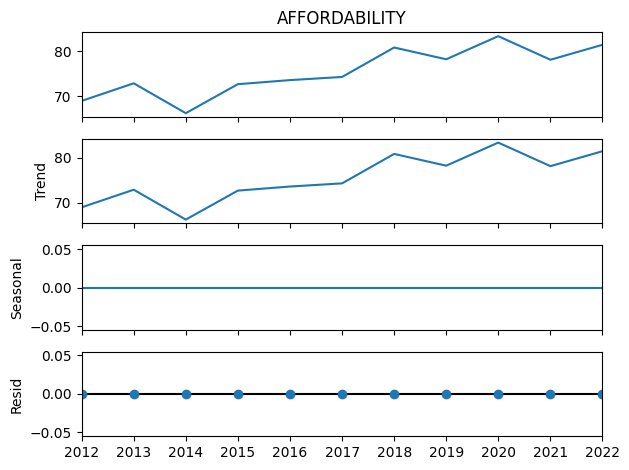

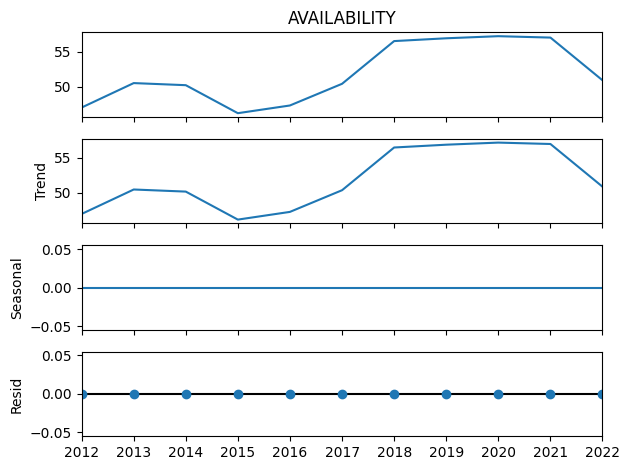

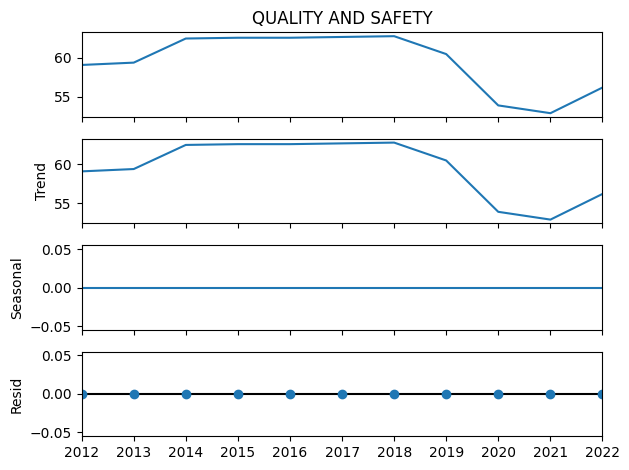

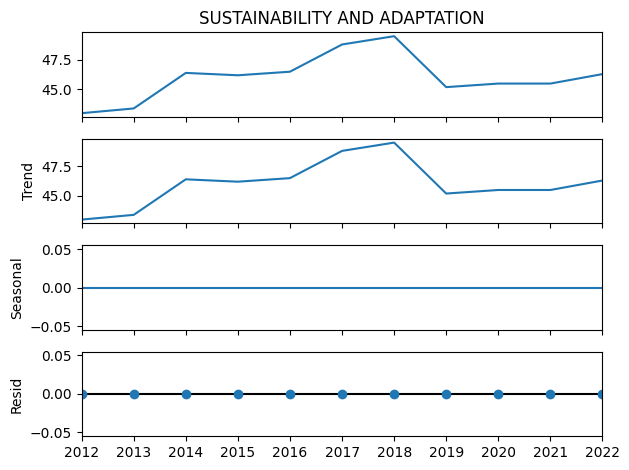

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

for col in number_data.columns:
    series = data.set_index('Date')[col]
    result = seasonal_decompose(series, model='additive')
    result.plot()
    pyplot.show()

### <b>C.5. <span style='color:#55679C'>Statistik Deskriptif</span></b>

In [ ]:
# Hitung statistik deskriptif
statistics = pd.DataFrame({
    'mean' : number_data.mean().round(2),
    'median': number_data.median(),
    'modus': number_data.mode().iloc[0],
    'min': number_data.min(),
    'max': number_data.max(),
    'q1' : number_data.quantile(0.25),
    'q2' : number_data.quantile(0.50),
    'q3' : number_data.quantile(0.75),
    'stdev' : number_data.std().round(2)
})

# Tampilkan hasilnya
display(statistics.T)

,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
mean,75.51,51.83,59.56,46.03
median,74.30,50.50,60.50,46.20
modus,66.30,46.20,62.60,45.50
min,66.30,46.20,52.90,43.00
max,83.30,57.20,62.80,49.50
q1,72.80,48.75,57.65,45.35
q2,74.30,50.50,60.50,46.20
q3,79.50,56.70,62.60,46.45
stdev,5.33,4.31,3.69,1.94


### <b>C.6. <span style='color:#55679C'>Korelasi</span></b>

In [ ]:
# Import library yang dibutuhkan
import plotly.express as px

# Hitung korelasi
korelasi = number_data.corr('pearson')

# Buat Heat Map
fig = px.imshow(
    korelasi,
    text_auto = True,
    color_continuous_scale = 'Blues'
)

# Jangan tampilkan color axes / legend
fig.update_coloraxes(
    showscale = False
)

# Percantik tampilan
fig.update_layout(
    width = 900,
    height = 900,
    title = dict(
        text = "<b>Korelasi Antar Variable pada Data</b>",
        font = dict(
            size = 25,
            color = '#0E2954'
        ),
        y = 0.89,
        x = 0.5
    ),
    margin = dict(
        t = 10,
        b = 30,
        r = 50,
        l = 50
    )
)

# Tampilkan hasil visualisasi
fig.show(renderer = 'colab')

### <b>C.7. <span style='color:#55679C'>Uji Stasioner : Augmented Dickey-Fuller</span></b>

Uji <i>Augmented Dickey-Fuller</i> adalah jenis uji statistik yang disebut *unit root test* (uji akar unit).

Dalam teori dan statistik probabilitas, akar unit adalah fitur dari beberapa proses stokastik (seperti jalan acak) yang dapat menyebabkan masalah dalam inferensi statistik yang melibatkan model deret waktu. Secara sederhana, akar unit tidak stasioner tetapi tidak selalu memiliki komponen tren. Asumsi tes ini :

**Hipotesa Null (H0)** : Data terindikasi non-stasioner atau memiliki *unit root*.

**Hipotesa Alternatif (H1)** :  Data terindikasi stasioner atau tidak memiliki *unit root*.

docs : <i>https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html</i>

In [ ]:
# Import library yang dibutuhkan
from statsmodels.tsa import stattools

def uji_adfuller(Series, alpha):

    # Proses pengujian ADF
    adfuller_test = stattools.adfuller(
        Series,
        autolag = 'AIC',
        regression = 'ct'
    )[ : 4]

    # Pengambilan Kesimpulan berdasarkan p-value
    if(adfuller_test[1] < alpha):
        adfuller_test += ('H0 ditolak', 'Data terindikasi Stasioner')
    else:
        adfuller_test += ('H0 diterima', 'Data terindikasi Non-Stasioner')

    # Jadikan dataframe
    output_adfuller = pd.DataFrame({
        'Keterangan' : ['Uji Statistik', 'p-value', 'Lags digunakan', 'Banyak Observasi', 'Hasil Uji', 'Kesimpulan'],
        'Nilai uji' : adfuller_test
    })

    return(output_adfuller, adfuller_test[5])

In [ ]:
# Toleransi error 5%
alpha = 0.05
hasil_uji_adf = dict()

print("\033[1;34m--- UJI STASIONERITAS ---\033[0m")

for col in number_data.columns:
    print(f"\n\n\033[93m{col}\033[0m\n")
    df, adf_result = uji_adfuller(data[col], alpha)
    hasil_uji_adf.update({col:adf_result})
    display(df)

--- UJI STASIONERITAS ---


AFFORDABILITY



,Keterangan,Nilai uji
0,Uji Statistik,-3.795551
1,p-value,0.016787
2,Lags digunakan,0
3,Banyak Observasi,10
4,Hasil Uji,H0 ditolak
5,Kesimpulan,Data terindikasi Stasioner




AVAILABILITY



,Keterangan,Nilai uji
0,Uji Statistik,-1.721819
1,p-value,0.741182
2,Lags digunakan,2
3,Banyak Observasi,8
4,Hasil Uji,H0 diterima
5,Kesimpulan,Data terindikasi Non-Stasioner




QUALITY AND SAFETY



,Keterangan,Nilai uji
0,Uji Statistik,-2.859651
1,p-value,0.175898
2,Lags digunakan,1
3,Banyak Observasi,9
4,Hasil Uji,H0 diterima
5,Kesimpulan,Data terindikasi Non-Stasioner




SUSTAINABILITY AND ADAPTATION



,Keterangan,Nilai uji
0,Uji Statistik,-1.821057
1,p-value,0.694517
2,Lags digunakan,0
3,Banyak Observasi,10
4,Hasil Uji,H0 diterima
5,Kesimpulan,Data terindikasi Non-Stasioner


In [ ]:
hasil_uji_adf

{'AFFORDABILITY': 'Data terindikasi Stasioner',
 'AVAILABILITY': 'Data terindikasi Non-Stasioner',
 'QUALITY AND SAFETY': 'Data terindikasi Non-Stasioner',
 'SUSTAINABILITY AND ADAPTATION': 'Data terindikasi Non-Stasioner'}

dari hasil pengujian semua variabel terindikasi non-stasioner kecuali AFFORDABILITY. Sehingga bisa gunakan model yang mengabaikan asumsi stasioneritas

# <b>D. <span style='color:#3A6D8C'>Pre-Model</span></b>

## <b>D.1. <span style='color:#3A6D8C'>Atur Index</span></b>

In [ ]:
# Buat date menjadi index
data = data.set_index('Date')

# Hapus kolom year
data = data.drop(columns = 'Year')

# Tampilkan data
display(data)

,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
Date,,,,
2012-01-01,69.0,47.0,59.1,43.0
2013-01-01,72.9,50.5,59.4,43.4
2014-01-01,66.3,50.2,62.5,46.4
2015-01-01,72.7,46.2,62.6,46.2
2016-01-01,73.6,47.3,62.6,46.5
2017-01-01,74.3,50.4,62.7,48.8
2018-01-01,80.8,56.5,62.8,49.5
2019-01-01,78.2,56.9,60.5,45.2
2020-01-01,83.3,57.2,53.9,45.5


## <b>D.2. <span style='color:#3A6D8C'>Proporsi Train-Test</span></b>

In [ ]:
# Hitung banyak data
banyak_data = data.shape[0]
print(f'Banyak data = {banyak_data}')

# Inisialisasi proporsi yang digunakan
train_proportion = 0.75
test_proportion = 1 - train_proportion

# Hitung banyak data train dan test
train_size = int(banyak_data * train_proportion)
test_size = banyak_data - train_size

# Tampilkan data
print(f'Banyak data train = {train_size}')
print(f'Banyak data test = {test_size}')

Banyak data = 11
Banyak data train = 8
Banyak data test = 3


## <b>D.3. <span style='color:#3A6D8C'>Split Data</span></b>

In [ ]:
# Proses pembagian data
X_train = data.iloc[:train_size]
X_test = data.iloc[train_size:]

# Tampilkan data train
display(X_train)

,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
Date,,,,
2012-01-01,69.0,47.0,59.1,43.0
2013-01-01,72.9,50.5,59.4,43.4
2014-01-01,66.3,50.2,62.5,46.4
2015-01-01,72.7,46.2,62.6,46.2
2016-01-01,73.6,47.3,62.6,46.5
2017-01-01,74.3,50.4,62.7,48.8
2018-01-01,80.8,56.5,62.8,49.5
2019-01-01,78.2,56.9,60.5,45.2


In [ ]:
# Tampilkan data train
display(X_test)

,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION
Date,,,,
2020-01-01,83.3,57.2,53.9,45.5
2021-01-01,78.1,57.0,52.9,45.5
2022-01-01,81.4,50.9,56.2,46.3


# <b>E. <span style='color:#3A6D8C'>Proses Modelling</span></b>

## <b>E.1. <span style='color:#3A6D8C'>Dynamic Factor</span></b>

In [ ]:
import plotly.express as px

def compare_test_forecast(data, x, y, params, mae):
    fig = px.line(
        data_frame = data,
        x = x,
        y = y,
        color = 'types',
        color_discrete_sequence = ['#10375C', '#F3C623']
    )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>Hasil Prediksi (MAE : {mae:6f})<b><br><sup><sup><span style='color:#000435;font-size:10'>Parameter : {params}</span></sup></sup>",
            font = dict(
                size = 28,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(renderer = 'colab')

In [ ]:
import numpy as np
from itertools import product
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_absolute_error

# Fungsi untuk mengevaluasi model DynamicFactor
def evaluate_dynamicfactor_model(train, test, k, f):
    try:
        # Fit model DynamicFactor
        model = DynamicFactor(X_train, k_factors=k, factor_order=f)
        model_fit = model.fit(enforce_stationarity = False)

        # Prediksi dengan model yang telah dilatih
        forecast = model_fit.forecast(steps = test.shape[0])

        # Hitung error prediksi
        mae = mean_absolute_error(test, forecast)
        print(f'k = {k}, f = {f} berhasil dengan MAE : {mae:.6f}')

        X_test_plot = test.copy()

        X_test_plot['types'] = 'Actual'
        forecast['types'] = 'Forecast'

        gabung = pd.concat([X_test_plot, forecast])
        #compare_test_forecast(gabung, x = gabung.index, y = 'FOOD SECURITY INDEX', params = {'k':k, 'f':f}, mae = mae)
        return mae, forecast

    except:
        print(f'p = {k}, q = {f} gagal')
        return np.nan, np.nan  # Jika terjadi error (misal model tidak konvergen), return NaN

In [ ]:
# Tentukan rentang nilai k dan f yang akan diuji
k_values = range(1, 5)
f_values = range(1, 5)

# Buat grid search untuk kombinasi parameter (k, f)
parameters = list(product(k_values, f_values))

# Inisialisasi nilai MAE terbaik
best_mae_DynamicFactor = float('inf')
best_params_DynamicFactor = None
best_forecast_DynamicFactor = None

# Grid search untuk parameter DynamicFactor
for param in parameters:
    k, f = param
    mae, forecast = evaluate_dynamicfactor_model(X_train, X_test, k, f)

    # Cek apakah MAE lebih baik dari yang sebelumnya
    if mae is not np.nan and mae < best_mae_DynamicFactor:
        best_mae_DynamicFactor = mae
        best_params_DynamicFactor = param
        best_forecast_DynamicFactor = forecast

# Tampilkan hasil terbaik
print(f"\nParameter terbaik: {best_params_DynamicFactor} dengan MAE: {best_mae_DynamicFactor:.6f}")

k = 1, f = 1 berhasil dengan MAE : 5.181559
k = 1, f = 2 berhasil dengan MAE : 5.971730
p = 1, q = 3 gagal
p = 1, q = 4 gagal
k = 2, f = 1 berhasil dengan MAE : 3.862147
p = 2, q = 2 gagal
p = 2, q = 3 gagal
p = 2, q = 4 gagal
k = 3, f = 1 berhasil dengan MAE : 5.270345
p = 3, q = 2 gagal
p = 3, q = 3 gagal
p = 3, q = 4 gagal
p = 4, q = 1 gagal
p = 4, q = 2 gagal
p = 4, q = 3 gagal
p = 4, q = 4 gagal

Parameter terbaik: (2, 1) dengan MAE: 3.862147


In [ ]:
mae_list = list()
for col in X_test.columns:
    mae = mean_absolute_error(X_test[col], best_forecast_DynamicFactor[col])
    mae_list.append(mae)

# Error
pd.DataFrame({
    'kolom' : X_test.columns,
    'mae' : mae_list
})

,kolom,mae
0,AFFORDABILITY,5.880699
1,AVAILABILITY,2.676670
2,QUALITY AND SAFETY,6.218577
3,SUSTAINABILITY AND ADAPTATION,0.672643


In [ ]:
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_absolute_error

model = DynamicFactor(data, k_factors=2, factor_order=1)
model_fit = model.fit(enforce_stationarity = True)

# Prediksi dengan model yang telah dilatih
forecast = model_fit.forecast(steps = 8)

print(model_fit.summary())

                                                              Statespace Model Results                                                              
Dep. Variable:     ['AFFORDABILITY', 'AVAILABILITY', 'QUALITY AND SAFETY', 'SUSTAINABILITY AND ADAPTATION']   No. Observations:                   11
Model:                                                                    DynamicFactor(factors=2, order=1)   Log Likelihood                -114.112
Date:                                                                                      Fri, 06 Dec 2024   AIC                            260.224
Time:                                                                                              18:49:01   BIC                            266.590
Sample:                                                                                          01-01-2012   HQIC                           256.211
                                                                                               - 01-01-202

In [ ]:
# Mengambil baris terakhir
data_plot = data.copy()
last_row = data_plot.iloc[[-1]]
data_plot['Type'] = 'Actual'

# Menggandakan baris terakhir dengan concat
forecast = pd.concat([forecast, last_row], ignore_index=False)
forecast['Type'] = 'Forecast'

data_plot = pd.concat([data_plot, forecast], ignore_index=False)
data_plot = data_plot.sort_index()
data_plot

,AFFORDABILITY,AVAILABILITY,QUALITY AND SAFETY,SUSTAINABILITY AND ADAPTATION,Type
2012-01-01,69.000000,47.000000,59.100000,43.000000,Actual
2013-01-01,72.900000,50.500000,59.400000,43.400000,Actual
2014-01-01,66.300000,50.200000,62.500000,46.400000,Actual
2015-01-01,72.700000,46.200000,62.600000,46.200000,Actual
2016-01-01,73.600000,47.300000,62.600000,46.500000,Actual
2017-01-01,74.300000,50.400000,62.700000,48.800000,Actual
2018-01-01,80.800000,56.500000,62.800000,49.500000,Actual
2019-01-01,78.200000,56.900000,60.500000,45.200000,Actual
2020-01-01,83.300000,57.200000,53.900000,45.500000,Actual
2021-01-01,78.100000,57.000000,52.900000,45.500000,Actual


In [ ]:
# Import library plotly untuk visualisasi data
import plotly.express as px

def plot_prediksi(data, y):
    fig = px.line(
        data_frame = data,
        x = data.index,
        y = y,
        color = 'Type',
        color_discrete_sequence = ['#FF0000', '#F3C623']
    )

    fig.update_layout(
        width = 1200,
        height = 500,
        showlegend = False,
        plot_bgcolor = 'rgba(0, 0, 0, 0)',
        title = dict(
            text = f"<b>{y}</b>",
            font = dict(
                size = 25,
                color = '#757882'
            ),
            y = 0.92,
            x = 0.5
        ),
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        margin = dict(
            t = 80,
            b = 10,
            r = 20
        )
    )

    fig.show(renderer = 'colab')

In [ ]:
for col in number_data.columns:
    plot_prediksi(data_plot, col)

In [ ]:
bobot_afford = 0.303
bobot_avail = 0.244
bobot_quality = 0.229
bobot_sustainability = 0.222

data_plot['FOOD SECURITY INDEX'] = \
    bobot_afford * data_plot['AFFORDABILITY'] + \
    bobot_avail * data_plot['AVAILABILITY'] + \
    bobot_quality * data_plot['QUALITY AND SAFETY'] + \
    bobot_sustainability * data_plot['SUSTAINABILITY AND ADAPTATION']

In [ ]:
plot_prediksi(data_plot, 'FOOD SECURITY INDEX')

---